# LAB 1 // Kompresja Obrazu za pomocą SVD
Adam Kubliński, 62204
24.02.2024

Rozwiązanie zadania kompresji obrazu metodą SVD według wariantu 6. 

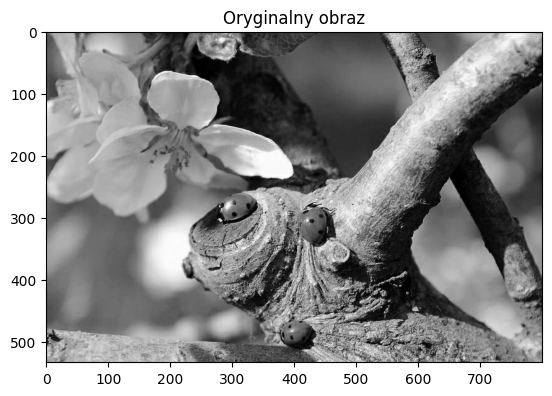

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from numpy.linalg import svd

img = imread('6.webp')
if img.ndim == 3:
    img = img.mean(axis=2) 

plt.imshow(img, cmap='gray')
plt.title('Oryginalny obraz')
plt.show()

In [3]:
U, S, VT = svd(img, full_matrices=False)

total_energy = np.sum(S**2)

energy_accumulated = 0
k = 0
while energy_accumulated / total_energy < 0.9:
    energy_accumulated += S[k]**2
    k += 1

print(f'Liczba wartości osobliwych do zachowania 90% energii: {k}')

Liczba wartości osobliwych do zachowania 90% energii: 4


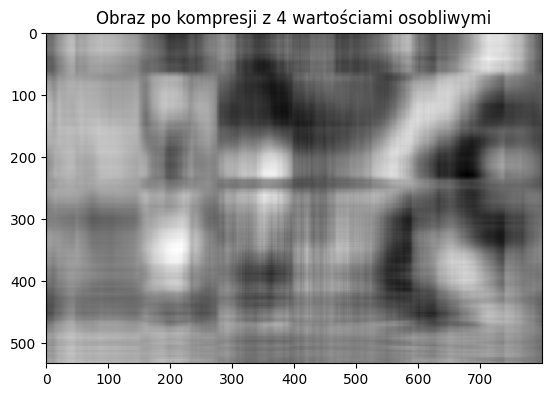

In [4]:
S_k = np.diag(S[:k])
U_k = U[:, :k]
VT_k = VT[:k, :]
img_compressed = U_k @ S_k @ VT_k

plt.imshow(img_compressed, cmap='gray')
plt.title(f'Obraz po kompresji z {k} wartościami osobliwymi')
plt.show()